In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline

Importer avec Pandas la base de données disponible ici https://archive.ics.uci.edu/
ml/machine-learning-databases/auto-mpg/auto-mpg.data. On peut aussi ajouter le noms
des colonnes en consultant l’adresse : https://archive.ics.uci.edu/ml/machine-learningdatabases/auto-mpg/auto-mpg.names
avec l’attribut 'name' de import_csv. On pourra regarder
l’intérêt de l’option sep=r"\s\+".

In [318]:
names = [ 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
    'acceleration',
   'model year', 'origin', 'car name' ]

In [319]:
auto_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                        engine="python", sep=r"\s\s+|\t", names= names)

Quelle est le marqueur utilisé pour les données manquantes dans le fichier csv utilisé ? Changer
cet élément en un NaN, avec l’option na_values de import_csv. Enlever les lignes possédant des
valeurs manquantes dans la base de données.

In [320]:
pd.unique(auto_data['horsepower'].values.ravel())

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [321]:
auto_data.replace('?', np.nan, inplace= True)
print(auto_data.count())
auto_data = auto_data.dropna()
print(auto_data.count())

mpg             398
cylinders       398
displacement    398
horsepower      392
weight          398
acceleration    398
model year      398
origin          398
car name        398
dtype: int64
mpg             392
cylinders       392
displacement    392
horsepower      392
weight          392
acceleration    392
model year      392
origin          392
car name        392
dtype: int64


/Users/galicher/anaconda/lib/python3.4/site-packages/pandas/core/common.py:449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


Calculer θˆ et yˆ sur une sous partie de la base : garder les 9 premières lignes et exclure la variable
'car name' de l’étude. Que constatez-vous ?


In [322]:
lr = linear_model.LinearRegression(normalize=True)
y = auto_data['mpg'][0:9]
X = auto_data[auto_data.columns[1:-1]][0:9]
lr.fit(X, y)
print(lr.coef_)
print(lr.intercept_)

[ 0.          0.05408848 -0.0945306  -0.00424074 -0.19936701  0.          0.        ]
30.7716953656


Calculer θˆ et yˆ cette fois sur l’intégralité des données.

In [323]:
y = auto_data['mpg']
X = auto_data[auto_data.columns[1:-1]]
lr.fit(X, y)
print(lr.coef_)
print(lr.intercept_)

[-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.4261405 ]
-17.218434622


Calculer le carré de la norme du vecteur des résidus }r}
2
, puis la moyenne des ces écarts }r}
2
{pn´pq.
Vérifier numériquement que :

In [324]:
norm = np.linalg.norm(y-lr.predict(X))
print(norm**2)
print(norm**2/(y.size-len(X.columns)))
print(lr.score(X,y))

4252.21253044
11.0447078713
0.821478076481


In [325]:
print(np.linalg.norm(y-y.mean())**2)
print((np.linalg.norm(y-lr.predict(X))**2 + (np.linalg.norm(lr.predict(X) - y.mean()))**2))

23818.9934694
23818.9934694


Supposons que l’on vous fournisse les caractéristiques suivantes d’un nouveau véhicule :
cylinders displacement horsepower weight acceleration year origin
6 225 100 3233 15.4 76 1
Prédire sa consommation 2

In [326]:
X_new= [[6, 225, 100, 3233, 15.4, 76, 1]]
print (lr.predict(X_new))

[ 21.39786251]


Calculer de nouveau θˆ et yˆ mais cette fois après avoir centré et réduit les variables explicatives.

In [327]:
# déjà fait ... au travers de normalize = True dans l'intialisation de linear_model

In [328]:
from sklearn.preprocessing import PolynomialFeatures

In [329]:
poly = PolynomialFeatures(2, interaction_only= False)
X_t = poly.fit_transform(X)
lr.fit(X_t ,y)
norm = np.linalg.norm(y-lr.predict(X_t))
print(norm**2)


2493.50275268


In [330]:
poly = PolynomialFeatures(2, interaction_only= True)
X_t = poly.fit_transform(X)
lr.fit(X_t ,y)
norm = np.linalg.norm(y-lr.predict(X_t))
print(norm**2)
print(norm**2/(y.size-len(X.columns)))

2635.57284615
6.84564375624


In [331]:
lr.score(X_t, y)

0.8893499488322103

In [332]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.000001, normalize = True)
clf.fit(X_t, y)
clf.score(X_t, y)

0.88934570958712267

In [333]:
from sklearn.linear_model import Ridge
from sklearn import grid_search
clf = Ridge(normalize=True)
parameters = {'alpha':  [ 10**i for i in range (-10,10)]}
gs = grid_search.GridSearchCV(clf, param_grid = parameters, cv=5)
gs.fit(X_t, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, solver='auto', tol=0.001),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'alpha': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [334]:
gs.grid_scores_

[mean: 0.69245, std: 0.18422, params: {'alpha': 1e-10},
 mean: 0.69245, std: 0.18421, params: {'alpha': 1e-09},
 mean: 0.69247, std: 0.18421, params: {'alpha': 1e-08},
 mean: 0.69267, std: 0.18418, params: {'alpha': 1e-07},
 mean: 0.69446, std: 0.18394, params: {'alpha': 1e-06},
 mean: 0.70338, std: 0.18422, params: {'alpha': 1e-05},
 mean: 0.71154, std: 0.18704, params: {'alpha': 0.0001},
 mean: 0.71300, std: 0.18274, params: {'alpha': 0.001},
 mean: 0.70690, std: 0.18390, params: {'alpha': 0.01},
 mean: 0.67782, std: 0.20818, params: {'alpha': 0.1},
 mean: 0.54820, std: 0.37068, params: {'alpha': 1},
 mean: 0.20889, std: 0.70437, params: {'alpha': 10},
 mean: -0.63984, std: 1.01476, params: {'alpha': 100},
 mean: -0.97588, std: 1.09614, params: {'alpha': 1000},
 mean: -1.01840, std: 1.10603, params: {'alpha': 10000},
 mean: -1.02277, std: 1.10704, params: {'alpha': 100000},
 mean: -1.02320, std: 1.10714, params: {'alpha': 1000000},
 mean: -1.02325, std: 1.10715, params: {'alpha': 100

In [335]:
gs.get_params()
gs.best_estimator_

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, solver='auto', tol=0.001)

In [336]:
gs.best_estimator_.coef_

array([  0.00000000e+00,  -1.39700432e+00,  -3.13994906e-02,
         7.28306731e-02,  -3.65641956e-03,  -2.36673277e+00,
         9.23103500e-01,  -4.91425576e+00,   8.76608300e-04,
         3.27685103e-03,   2.93832213e-04,   1.26481567e-01,
        -2.54390403e-02,   1.57087839e-01,  -2.74033286e-06,
         8.54030059e-06,  -7.31045868e-04,  -3.37992999e-04,
         2.57786751e-02,   8.39646215e-06,  -5.11195990e-03,
        -1.15374123e-03,  -1.23515081e-02,   6.89707186e-05,
        -7.26129444e-05,  -6.34916289e-04,   2.05761365e-02,
         3.06632350e-01,  -5.82311713e-03])

In [337]:
from sklearn import linear_model
clf_l = linear_model.Lasso(normalize=True, max_iter= 1000)
parameters = {'alpha':  [ 10**i for i in range (-10,10)]}
gs_l = grid_search.GridSearchCV(clf_l, param_grid = parameters, cv=5)
gs_l.fit(X_t, y)

/Users/galicher/anaconda/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/Users/galicher/anaconda/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/Users/galicher/anaconda/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/Users/galicher/anaconda/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/Users/galicher/anaconda/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:444: Converg

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'alpha': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [338]:
gs_l.best_estimator_.coef_

array([  0.00000000e+00,   2.88625836e-01,   4.86106635e-04,
         9.33083577e-02,  -5.58259268e-03,  -2.24973788e+00,
         1.16134232e+00,  -1.59908938e+00,   3.06870844e-04,
         2.21833331e-03,   3.32651152e-04,   1.59689782e-01,
        -5.10166720e-02,   1.11750683e-01,  -1.25464474e-05,
         1.01981422e-05,  -1.06972683e-03,  -7.01794136e-04,
         2.55669288e-02,   5.13645870e-06,  -5.14399010e-03,
        -1.05864828e-03,  -1.77645806e-02,   5.44209099e-05,
        -5.46065039e-05,  -2.94399281e-04,   1.85007523e-02,
         3.01720575e-01,  -4.92926137e-02])

In [339]:
gs_l.grid_scores_

[mean: 0.70348, std: 0.19928, params: {'alpha': 1e-10},
 mean: 0.70348, std: 0.19928, params: {'alpha': 1e-09},
 mean: 0.70348, std: 0.19927, params: {'alpha': 1e-08},
 mean: 0.70348, std: 0.19927, params: {'alpha': 1e-07},
 mean: 0.70353, std: 0.19918, params: {'alpha': 1e-06},
 mean: 0.70401, std: 0.19832, params: {'alpha': 1e-05},
 mean: 0.70795, std: 0.19071, params: {'alpha': 0.0001},
 mean: 0.70448, std: 0.18214, params: {'alpha': 0.001},
 mean: 0.63023, std: 0.21466, params: {'alpha': 0.01},
 mean: 0.33205, std: 0.76252, params: {'alpha': 0.1},
 mean: -1.02325, std: 1.10715, params: {'alpha': 1},
 mean: -1.02325, std: 1.10715, params: {'alpha': 10},
 mean: -1.02325, std: 1.10715, params: {'alpha': 100},
 mean: -1.02325, std: 1.10715, params: {'alpha': 1000},
 mean: -1.02325, std: 1.10715, params: {'alpha': 10000},
 mean: -1.02325, std: 1.10715, params: {'alpha': 100000},
 mean: -1.02325, std: 1.10715, params: {'alpha': 1000000},
 mean: -1.02325, std: 1.10715, params: {'alpha': 1

In [340]:
gs_l.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [341]:
gs_l.score(X_t, y)

0.88284903994611763

Afficher dans le cas unidimensionnel, les bornes inf et sup des intervalles de confiance à 98%. On
affichera deux courbes de traits en pointillés pour cela.

In [342]:
lr.coef_

array([  0.00000000e+00,   6.98857616e+00,  -4.78538689e-01,
         5.03433939e-01,   4.13288566e-03,  -5.85917321e+00,
         6.97430284e-01,  -2.08955704e+01,  -3.38326306e-03,
         1.16133262e-02,   3.57462990e-04,   2.77871993e-01,
        -1.74125857e-01,   4.02168216e-01,  -8.49062164e-05,
         2.47186800e-05,  -3.47899523e-03,   5.93380246e-03,
         2.39811277e-02,  -1.96842975e-05,  -7.21273895e-03,
        -5.83750571e-03,   2.23250718e-03,   2.34619450e-04,
        -2.24523733e-04,  -5.78847492e-04,   5.56215079e-02,
         4.58316099e-01,   1.39257020e-01])

dans le cas d'un bruit gaussien: 

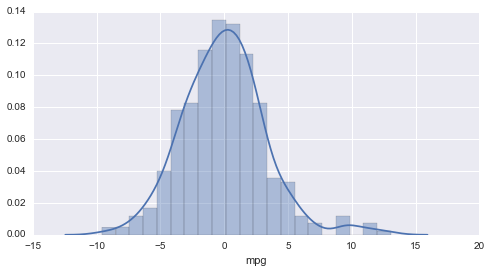

In [343]:
# vérifions l'hypothèse gaussienne en reagrdant l'histogramme des résidus
import seaborn as sns, numpy as np
y = auto_data['mpg']
X = auto_data[auto_data.columns[1:-1]]
lr.fit(X, y)
sns.set(rc={"figure.figsize": (8, 4)})
ax = sns.distplot(y-lr.predict(X))

In [344]:
# il semble "acceptable" d'utiliser la loi de student
from scipy.stats import t
df = y.size - np.ndim(X)
alpha = 0.02
XTXjj = np.diag(np.dot(np.transpose(np.array(X.astype(float))),np.array(X.astype(float))))
XTXjj = np.sqrt(1.0/XTXjj)
sigma = np.linalg.norm(y-lr.predict(X))/(y.size-len(X.columns))
student_param = t.interval(1-alpha/2,df)[1]
thetas = pd.DataFrame([lr.coef_ - sigma*student_param*XTXjj,
                       lr.coef_ + sigma*student_param*XTXjj ]).transpose()
thetas.columns= ['INF','SUP']
thetas

,INF,SUP
0,-0.497240,-0.489512
1,0.019795,0.019996
2,-0.017150,-0.016752
3,-0.006481,-0.006467
4,0.079173,0.081979
5,0.750482,0.751064
6,1.413629,1.438652


Proposer une manière de gérer les variables qualitatives dans le cas auto-mpg, potentiellement avec
sklearn.preprocessing.OneHotEncoder.

In [347]:
pd.unique(auto_data['car name'].values.ravel())
auto_data['car name'] = auto_data['car name'].str.replace('"','')
auto_data['brand'] = auto_data['car name'].str.split(r"\s").str[0]
auto_data['model'] = auto_data['car name'].str.split(r"\s").str[1]
auto_data.fillna('unknown')
pd.unique(auto_data['model'].values.ravel())
auto_data['model'] = auto_data['model'].astype(str)
auto_data['brand'] = auto_data['brand'].str.replace('toyouta','toyota')
auto_data['brand'] = auto_data['brand'].str.replace('chevroelt','chevrolet')
auto_data['brand'] = auto_data['brand'].str.replace('maxda','mazda')
auto_data['brand'] = auto_data['brand'].str.replace('vokswagen','volkswagen')
auto_data['brand'] = auto_data['brand'].str.replace('vw','volkswagen')
auto_data['brand'] = auto_data['brand'].str.replace('mercedes-benz','mercedes')
auto_data['brand'] = auto_data['brand'].str.replace('mercedes','mercedes-benz')
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
enc = OneHotEncoder(sparse=False)
le = LabelEncoder()
le.fit(auto_data['brand'].values)
auto_data['brand'] = le.transform(auto_data['brand'].values)
le_model = LabelEncoder()
le_model.fit(auto_data['model'].values)
auto_data['model'] = le_model.transform(auto_data['model'].values)
auto_data.head()
#from sklearn.feature_extraction import DictVectorizer




,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,brand,model
0,18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu,6,67
1,15,8,350,165.0,3693,11.5,70,1,buick skylark 320,3,166
2,18,8,318,150.0,3436,11.0,70,1,plymouth satellite,22,162
3,16,8,304,150.0,3433,12.0,70,1,amc rebel sst,0,152
4,17,8,302,140.0,3449,10.5,70,1,ford torino,12,177


In [348]:
#dummies = pd.get_dummies(auto_data['full desc'])

In [349]:
X_c = pd.concat([X, auto_data[['brand','model']]], axis=1)
X_c.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,model
0,8,307,130.0,3504,12.0,70,1,6,67
1,8,350,165.0,3693,11.5,70,1,3,166
2,8,318,150.0,3436,11.0,70,1,22,162
3,8,304,150.0,3433,12.0,70,1,0,152
4,8,302,140.0,3449,10.5,70,1,12,177


In [359]:
lr2 = linear_model.LinearRegression(normalize=True)
#poly = PolynomialFeatures(2, interaction_only= False)
#X_t = poly.fit_transform(X_c)
lr2.fit(X_c ,y)
norm = np.linalg.norm(y-lr2.predict(X_c))
print(norm**2)
print(lr2.score(X_c,y))
print(lr2.coef_)

4186.4249438
0.824240056609
[-0.49830437  0.02265709 -0.01979455 -0.00666052  0.06992319  0.7573404
  1.16619718  0.04601704 -0.00586574]


In [354]:
lr2 = linear_model.LinearRegression(normalize=True)
poly = PolynomialFeatures(2, interaction_only= False)
X_t = poly.fit_transform(X_c)
lr2.fit(X_t ,y)
norm = np.linalg.norm(y-lr2.predict(X_t))
print(norm**2)
print(lr2.score(X_t,y))

2353.81250259
0.901179178473


In [358]:
lr2.coef_

array([ -1.51186871e+01,  -7.44668911e+00,  -6.94167983e+00,
        -6.19946345e-01,  -5.57499215e-01,  -2.13266390e-01,
        -1.39786424e-01,  -1.01565822e-01,  -9.46342643e-02,
        -5.25307184e-02,  -3.12012968e-03,  -2.93937316e-03,
        -2.82427665e-03,  -1.97306757e-03,  -1.69862146e-03,
        -1.65377393e-03,  -1.23347015e-03,  -7.64573702e-04,
        -3.98883839e-04,  -3.46238851e-04,  -2.85999521e-04,
        -1.99328429e-04,  -1.03814259e-04,  -7.70573812e-05,
        -5.90875711e-05,  -5.37500880e-05,  -2.74543085e-05,
        -1.49187204e-05,  -1.24180782e-05,   0.00000000e+00,
         2.80585586e-07,   5.47696255e-06,   7.12213807e-06,
         1.02288279e-05,   3.90822491e-04,   6.96365910e-04,
         1.24243017e-03,   2.10102785e-03,   4.45706343e-03,
         4.64302066e-03,   4.76034307e-03,   6.24981796e-03,
         1.14247265e-02,   1.76800027e-02,   2.58565128e-02,
         3.64461031e-02,   5.19336089e-02,   5.82838345e-02,
         6.01667504e-02,